In [64]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
match = pd.read_csv("datasets/matches.csv") # read match csv file
delivery = pd.read_csv("datasets/deliveries.csv") # read delivery csv file

In [67]:
match.head() # getting top 5 rows of the csv file

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [68]:
match.shape # size of csv

(756, 18)

In [69]:
delivery.head() # top 5 rows of delivery csv file

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [70]:
delivery.shape # size of csv

(179078, 21)

In [71]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [72]:
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


<AxesSubplot:xlabel='match_id', ylabel='total_runs'>

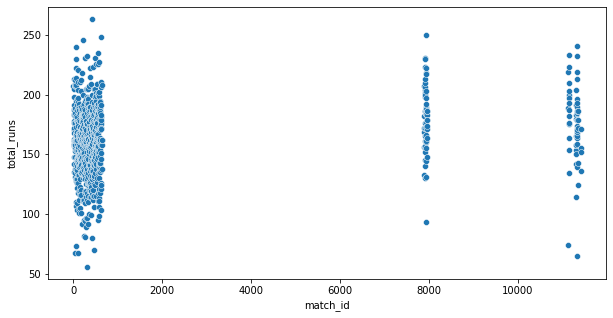

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=total_score_df,x='match_id',y='total_runs')

In [74]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [75]:
match_df.shape

(756, 20)

In [76]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

teams = [
'Sunrisers Hyderabad','Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals','Delhi Daredevils'
       ]

In [77]:
teams = ['Sunrisers Hyderabad','Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals','Delhi Daredevils']


In [78]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [79]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [80]:
match_df.shape

(480, 20)

In [81]:
match_df = match_df[match_df['dl_applied'] == 0] # taking that in which dl applied = 0

In [82]:
match_df.shape

(470, 20)

In [83]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
10,11,IPL-2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN,11,170


<AxesSubplot:xlabel='city', ylabel='winner'>

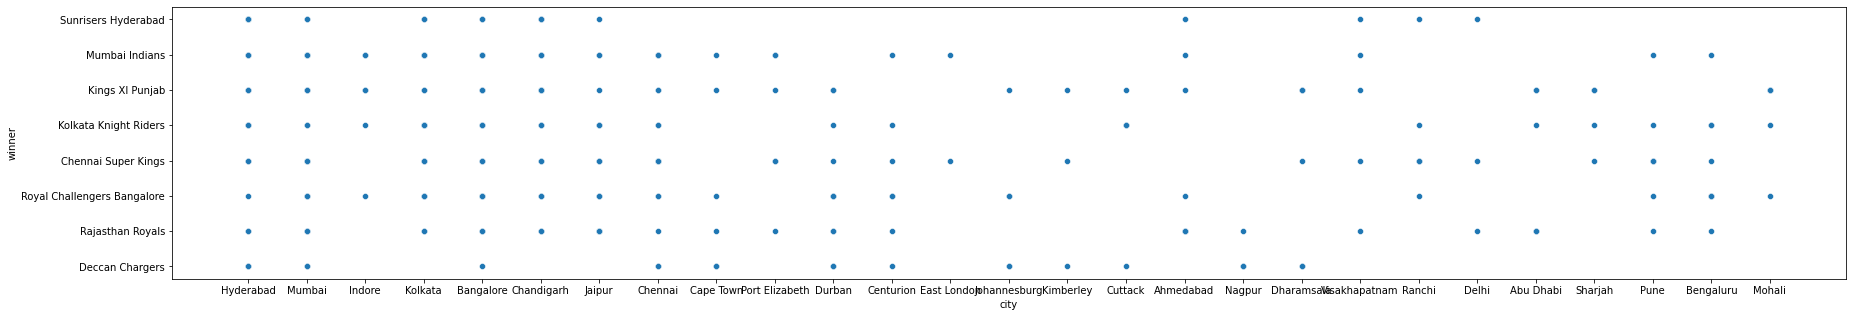

In [84]:
plt.figure(figsize=(30,5))
sns.scatterplot(data=match_df, x='city', y='winner')

In [85]:
delivery_df = match_df.merge(delivery,on='match_id')

In [86]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [87]:

delivery_df.shape

(54619, 40)

In [88]:
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [89]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [90]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [91]:
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [92]:
delivery_df.shape

(54619, 43)

In [93]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,0,1,0,NaN,NaN,1,206,113,10
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,1,206,112,10
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,1,206,111,10
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,0,2,0,NaN,NaN,3,204,110,10
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,0,4,0,NaN,NaN,7,200,109,10


In [94]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [95]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [96]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [97]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [98]:
delivery_df.shape

(54619, 46)

In [99]:
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,1,0,NaN,NaN,1,206,113,10,0.857143,10.938053
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,0,NaN,NaN,1,206,112,10,0.750000,11.035714
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,0,NaN,NaN,1,206,111,10,0.666667,11.135135
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,2,0,NaN,NaN,3,204,110,10,1.800000,11.127273
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,4,0,NaN,NaN,7,200,109,10,3.818182,11.009174


In [100]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [101]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
83451,Mumbai Indians,Royal Challengers Bangalore,Mumbai,234,113,10,235,0.857143,12.424779,0


In [102]:
final_df.shape

(54619, 10)

In [103]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,113,10,207,0.857143,10.938053,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,112,10,207,0.750000,11.035714,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,111,10,207,0.666667,11.135135,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,110,10,207,1.800000,11.127273,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,109,10,207,3.818182,11.009174,0


In [104]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            589
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [105]:
final_df.dropna(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21456\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [106]:
final_df.shape

(54023, 10)

In [107]:
final_df = final_df[final_df['balls_left'] != 0]

In [108]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,113,10,207,0.857143,10.938053,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,112,10,207,0.750000,11.035714,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,111,10,207,0.666667,11.135135,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,110,10,207,1.800000,11.127273,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,109,10,207,3.818182,11.009174,0


In [109]:
final_df.shape

(53713, 10)

In [110]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [111]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
94838,Rajasthan Royals,Mumbai Indians,Jaipur,44,18,7,172,7.529412,14.666667
42704,Mumbai Indians,Kolkata Knight Riders,Kolkata,78,36,6,175,6.928571,13.000000
30769,Kings XI Punjab,Kolkata Knight Riders,Kolkata,139,81,9,200,9.384615,10.296296
2772,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,113,47,7,209,7.890411,14.425532
100002,Kings XI Punjab,Mumbai Indians,Mumbai,145,81,9,197,8.000000,10.740741


<AxesSubplot:xlabel='crr', ylabel='rrr'>

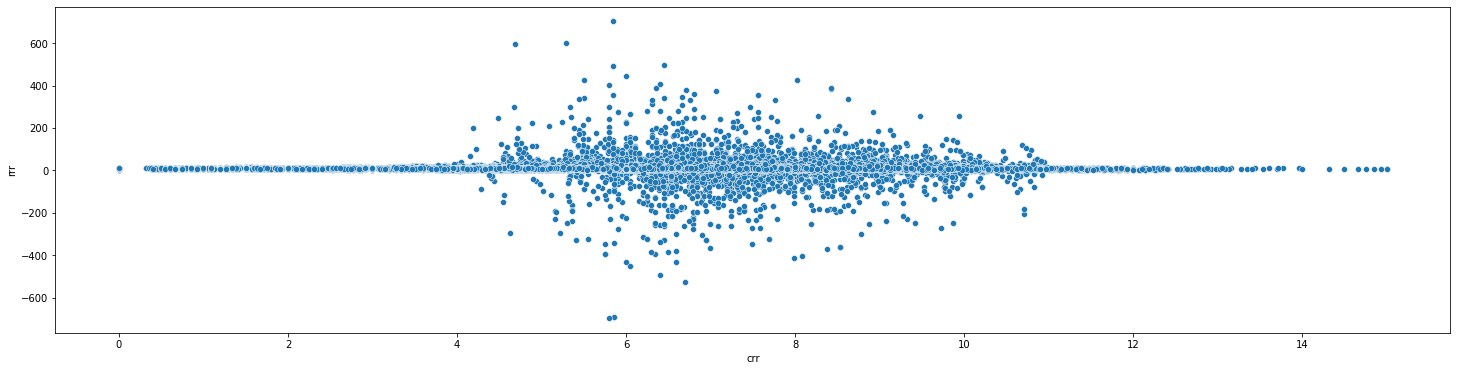

In [112]:
plt.figure(figsize=(25,6))
sns.scatterplot(data=X_train, x='crr', y='rrr')

In [113]:
X_train.shape

(42970, 9)

In [114]:
y_train.head()

94838     1
42704     1
30769     1
2772      0
100002    0
Name: result, dtype: int64

In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [116]:
X_train.shape

(42970, 9)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn import svm
from sklearn.pipeline import Pipeline

In [118]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
# step2',RandomForestClassifier() #LogisticRegression(solver='liblinear') # DecisionTreeClassifier(criterion='entropy', random_state=0)

In [119]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [120]:

y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      5196
           1       0.79      0.81      0.80      5547

    accuracy                           0.79     10743
   macro avg       0.79      0.79      0.79     10743
weighted avg       0.79      0.79      0.79     10743



In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

79.21437214930653

In [123]:
pipe.predict_proba(X_test)[10]

array([0.93923859, 0.06076141])

In [124]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [125]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [126]:
temp_df,target = match_progression(delivery_df,10,pipe) #match10
temp_df

Target- 158


,end_of_over,runs_after_over,wickets_in_over,lose,win
845,1,6,0,27.5,72.5
851,2,15,0,16.9,83.1
857,3,7,0,15.1,84.9
863,4,11,1,20.0,80.0
869,5,3,1,35.8,64.2
875,6,19,0,19.8,80.2
881,7,3,0,21.2,78.8
887,8,9,0,17.4,82.6
893,9,3,0,18.7,81.3
899,10,9,1,26.7,73.3


Text(0.5, 1.0, 'Target-158')

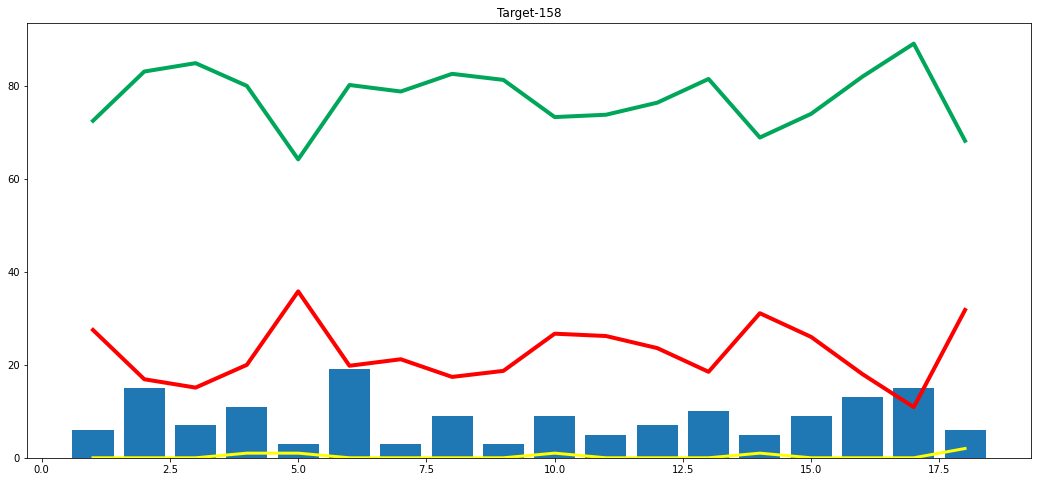

In [127]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [128]:
teams = [ 
 'Sunrisers Hyderabad','Mumbai Indians', 
 'Royal Challengers Bangalore', 
 'Kolkata Knight Riders', 
 'Kings XI Punjab', 
 'Chennai Super Kings', 
 'Rajasthan Royals',
 'Delhi Daredevils' 
]

In [129]:
delivery_df['city'].unique()

array(['Hyderabad', 'Mumbai', 'Indore', 'Kolkata', 'Bangalore',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Cuttack', 'Ahmedabad', 'Nagpur', 'Dharamsala', 'Visakhapatnam',
       'Ranchi', 'Delhi', 'Abu Dhabi', nan, 'Sharjah', 'Pune',
       'Bengaluru', 'Mohali'], dtype=object)

In [130]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb')) # write data to a file